In [1]:
%matplotlib inline
import nba_py as nba
from nba_py import player
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm
import math

We will look into some general metrics and see how the overall trend compares for shot clock time, playoffs, 4th quarter and determine which metrics are important for determining clutchness

In [ ]:
#loop through and get shot percentages for players between regular season and 4th quarter

#Also need to append player ID/Names

In [258]:
def get_player_data(pl_id):
    #Takes in player id and returns dataframe with player's historical data under specific conditions
    #We are observing shot percentages, rebounds, assists, turnovers and blocks
    #overall year by year data
    p_df1 = player.PlayerYearOverYearSplits(pl_id, period = '0').by_year()
    p_df1 = p_df1[['GROUP_VALUE','FG_PCT','FG3_PCT', 'FT_PCT', 'OREB', 'DREB',
                           'REB', 'AST', 'TOV', 'STL', 'BLK']]
    if p_df1.empty == False:
        p_df1 = p_df1.groupby(['GROUP_VALUE']).mean()
        p_df1 = p_df1.reset_index()
    
    p_df2 = player.PlayerYearOverYearSplits(pl_id, period = '4').by_year()
    p_df2 = p_df2[['GROUP_VALUE','FG_PCT','FG3_PCT', 'FT_PCT', 'OREB', 'DREB',
                           'REB', 'AST', 'TOV', 'STL', 'BLK']]
    if p_df2.empty == False:
        p_df2 = p_df2.groupby(['GROUP_VALUE']).mean()
        p_df2 = p_df2.reset_index()
    p_df2.columns = ['GROUP_VALUE','4Q_FG_PCT','4Q_FG3_PCT', '4Q_FT_PCT', '4Q_OREB', '4Q_DREB',
                        '4Q_REB', '4Q_AST', '4Q_TOV', '4Q_STL', '4Q_BLK']

    p_main = pd.merge(p_df1,p_df2, how = 'left', on ='GROUP_VALUE')

    p_df3 = player.PlayerYearOverYearSplits(pl_id, season_type = 'Playoffs').by_year()
    p_df3 = p_df3[['GROUP_VALUE','FG_PCT','FG3_PCT', 'FT_PCT', 'OREB', 'DREB',
                        'REB', 'AST', 'TOV', 'STL', 'BLK']]
    if p_df3.empty == False:
        p_df3 = p_df3.groupby(['GROUP_VALUE']).mean()
        p_df3 = p_df3.reset_index()
    p_df3.columns = ['GROUP_VALUE','PO_FG_PCT','PO_FG3_PCT', 'PO_FT_PCT', 'PO_OREB', 'PO_DREB',
                        'PO_REB', 'PO_AST', 'PO_TOV', 'PO_STL', 'PO_BLK']

    p_main = pd.merge(p_main, p_df3, how='left', on = 'GROUP_VALUE')
    
    p_df4 = player.PlayerYearOverYearSplits(pl_id, shot_clock_range = '4-0 Very Late').by_year()
    p_df4 = p_df4[['GROUP_VALUE','FG_PCT','FG3_PCT', 'FT_PCT', 'OREB', 'DREB',
                        'REB', 'AST', 'TOV', 'STL', 'BLK']]
    if p_df4.empty == False:
        p_df4 = p_df4.groupby(['GROUP_VALUE']).mean()
        p_df4 = p_df4.reset_index()
    p_df4.columns = ['GROUP_VALUE','SC_FG_PCT','SC_FG3_PCT', 'SC_FT_PCT', 'SC_OREB', 'SC_DREB',
                        'SC_REB', 'SC_AST', 'SC_TOV', 'SC_STL', 'SC_BLK']

    p_main = pd.merge(p_main, p_df4, how='left', on = 'GROUP_VALUE')
    p_main['PERSON_ID'] = [pl_id]*len(p_main)
    
    return (p_main)


In [83]:
plist = player.PlayerList(league_id='00', season='2016-17')
player_ids = plist.info()['PERSON_ID']

In [273]:
main_df = pd.DataFrame()
for cur_player in tqdm.tqdm(player_ids.values):
    cur_df = get_player_data(cur_player)
    main_df = main_df.append(cur_df)


100%|██████████| 486/486 [1:11:58<00:00,  8.63s/it]


In [275]:
df = pd.merge(main_df,plist.info()[['PERSON_ID','DISPLAY_FIRST_LAST']], how='left', on='PERSON_ID')

In [277]:
df.to_csv('overall_df.csv')

In [278]:
df.head()

,GROUP_VALUE,FG_PCT,FG3_PCT,FT_PCT,OREB,DREB,REB,AST,TOV,STL,...,SC_FT_PCT,SC_OREB,SC_DREB,SC_REB,SC_AST,SC_TOV,SC_STL,SC_BLK,PERSON_ID,DISPLAY_FIRST_LAST
0,2016-17,0.393000,0.381,0.898000,0.3,1.000000,1.300000,0.600000,0.500000,0.500000,...,0,0,0,0,0,0,0,0,203518,Alex Abrines
1,2012-13,0.560000,0.500,0.816000,1.0,1.600000,2.700000,0.400000,0.600000,0.400000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203112,Quincy Acy
2,2013-14,0.456333,0.289,0.650667,1.0,2.033333,3.033333,0.466667,0.433333,0.433333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203112,Quincy Acy
3,2014-15,0.459000,0.300,0.784000,1.2,3.300000,4.400000,1.000000,0.900000,0.400000,...,0,0,0.1,0.1,0.1,0,0,0,203112,Quincy Acy
4,2015-16,0.556000,0.388,0.735000,1.1,2.100000,3.200000,0.500000,0.500000,0.500000,...,0,0,0.1,0.1,0,0.1,0.1,0,203112,Quincy Acy


## Field Goal Percentage comparisons

Regular field goal percentage mean: 0.4392295953360765
Shot clock low field goal percentage mean: 0.3300223367697591


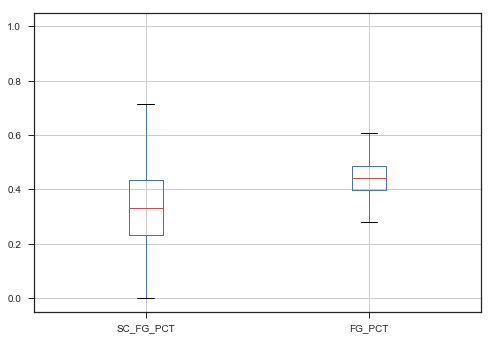

In [18]:
import seaborn
seaborn.set(style="ticks")

print('Regular field goal percentage mean: ' + str(df[df['GROUP_VALUE'] == '2016-17']['FG_PCT'].mean()))
print('Shot clock low field goal percentage mean: ' + str(df[df['GROUP_VALUE'] == '2016-17']['SC_FG_PCT'].mean()))

df[df['GROUP_VALUE'] == '2016-17'].boxplot(['SC_FG_PCT','FG_PCT'])

Regular 3 point percentage mean: 0.276814986282579
Shot clock low field goal percentage mean: 0.21251219931271478


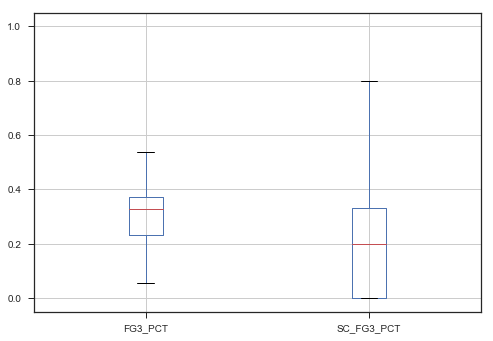

In [20]:
print('Regular 3 point percentage mean: ' + str(df[df['GROUP_VALUE'] == '2016-17']['FG3_PCT'].mean()))
print('Shot clock low field goal percentage mean: ' + str(df[df['GROUP_VALUE'] == '2016-17']['SC_FG3_PCT'].mean()))

df[df['GROUP_VALUE'] == '2016-17'].boxplot(['FG3_PCT','SC_FG3_PCT'])

Regular free throw percentage mean: 0.716347908093278
Playoff free throw percentage mean: 0.6257441860465115
4th Quarter free throw percentage mean: 0.6919106652949248


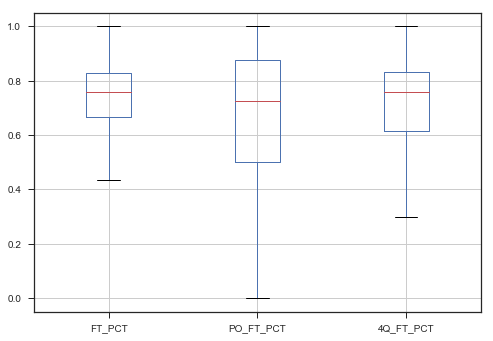

In [21]:
print('Regular free throw percentage mean: ' + str(df[df['GROUP_VALUE'] == '2016-17']['FT_PCT'].mean()))
print('Playoff free throw percentage mean: ' + str(df[df['GROUP_VALUE'] == '2016-17']['PO_FT_PCT'].mean()))
print('4th Quarter free throw percentage mean: ' + str(df[df['GROUP_VALUE'] == '2016-17']['4Q_FT_PCT'].mean()))

df[df['GROUP_VALUE'] == '2016-17'].boxplot(['FT_PCT','PO_FT_PCT','4Q_FT_PCT'])


In [314]:
df[df['GROUP_VALUE'] == '2016-17'].columns

Index(['GROUP_VALUE', 'FG_PCT', 'FG3_PCT', 'FT_PCT', 'OREB', 'DREB', 'REB',
       'AST', 'TOV', 'STL', 'BLK', '4Q_FG_PCT', '4Q_FG3_PCT', '4Q_FT_PCT',
       '4Q_OREB', '4Q_DREB', '4Q_REB', '4Q_AST', '4Q_TOV', '4Q_STL', '4Q_BLK',
       'PO_FG_PCT', 'PO_FG3_PCT', 'PO_FT_PCT', 'PO_OREB', 'PO_DREB', 'PO_REB',
       'PO_AST', 'PO_TOV', 'PO_STL', 'PO_BLK', 'SC_FG_PCT', 'SC_FG3_PCT',
       'SC_FT_PCT', 'SC_OREB', 'SC_DREB', 'SC_REB', 'SC_AST', 'SC_TOV',
       'SC_STL', 'SC_BLK', 'PERSON_ID', 'DISPLAY_FIRST_LAST'],
      dtype='object')

We clearly have a discrepency in statistics under specific conditions. Are these Significant!? RUN TEST. Can we determine which types of players are prone to make these bad judgements in crunch time? (Types of shots). How do we quantify clutchness and what other metrics will support the argument that one player is more clutch than another? (Look at average drop in performance compared to a specific player) 

Let's look more closely at the columns that matter for the 2016/17 season

In [32]:
df2 = df[df['GROUP_VALUE'] == '2016-17'][['GROUP_VALUE','DISPLAY_FIRST_LAST','PERSON_ID','FG_PCT','FG3_PCT','FT_PCT','SC_FG_PCT','SC_FG3_PCT','4Q_FT_PCT','PO_FT_PCT']]

In [33]:
df2.head()

,GROUP_VALUE,DISPLAY_FIRST_LAST,PERSON_ID,FG_PCT,FG3_PCT,FT_PCT,SC_FG_PCT,SC_FG3_PCT,4Q_FT_PCT,PO_FT_PCT
0,2016-17,Alex Abrines,203518,0.393,0.381000,0.898000,0.368000,0.400000,0.857000,0.750
5,2016-17,Quincy Acy,203112,0.377,0.329333,0.723667,0.203667,0.305667,0.712333,NaN
9,2016-17,Steven Adams,203500,0.571,0.000000,0.611000,0.333000,0.000000,0.574000,0.364
19,2016-17,Arron Afflalo,201167,0.440,0.411000,0.892000,0.360000,0.286000,0.944000,NaN
26,2016-17,Alexis Ajinca,201582,0.500,0.000000,0.725000,0.714000,0.000000,0.600000,NaN


In [34]:
df2['SC_FG_PCT_DIFF'] = df2['FG_PCT'] - df2['SC_FG_PCT']
df2['SC_FG3_PCT_DIFF'] = df2['FG3_PCT'] - df2['SC_FG3_PCT']
df2['PO_FT_PCT_DIFF'] = df2['FT_PCT'] - df2['PO_FT_PCT']
df2['4Q_FT_PCT_DIFF'] = df2['FT_PCT'] - df2['4Q_FT_PCT']

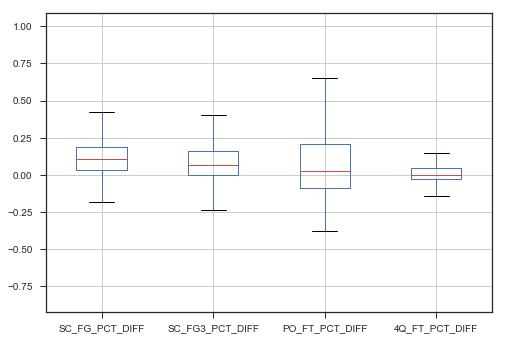

In [35]:
df2.boxplot(['SC_FG_PCT_DIFF','SC_FG3_PCT_DIFF','PO_FT_PCT_DIFF','4Q_FT_PCT_DIFF'])

## Let's see who's a clutch shooter and who isn't!?

### Shot clock shooting FG PCT

In [65]:
#first look at players who's SC_FG_PCT != 0 
cur_df = df2[df2['SC_FG_PCT'] != 0] 
cur_df = cur_df[cur_df['SC_FG_PCT'] != 0.5]
cur_df = cur_df[cur_df['SC_FG_PCT'] != 0.25]
cur_df[cur_df['SC_FG_PCT_DIFF'] > 0.3][['DISPLAY_FIRST_LAST','PERSON_ID',
                                            'FG_PCT','SC_FG_PCT','SC_FG_PCT_DIFF']].sort_values(by = 'SC_FG_PCT_DIFF',
                                                                                               ascending = False)


,DISPLAY_FIRST_LAST,PERSON_ID,FG_PCT,SC_FG_PCT,SC_FG_PCT_DIFF
2740,Ivica Zubac,1627826,0.529000,0.111000,0.418000
763,Joel Embiid,203954,0.466000,0.100000,0.366000
1668,Ian Mahinmi,101133,0.586000,0.222000,0.364000
973,Jerami Grant,203924,0.428333,0.066667,0.361667
2703,Delon Wright,1626153,0.422000,0.063000,0.359000
2250,Wayne Selden,1627782,0.485333,0.133333,0.352000
296,DeAndre' Bembry,1627761,0.480000,0.143000,0.337000
2067,Mason Plumlee,203486,0.538333,0.211000,0.327333
1987,Zaza Pachulia,2585,0.534000,0.214000,0.320000
2576,C.J. Watson,201228,0.387000,0.077000,0.310000


In [63]:
#first look at players who's SC_FG_PCT != 1 or 0.25*x  -> indicator of low number of shots
cur_df = df2[df2['SC_FG_PCT'] != 1] 
cur_df = cur_df[cur_df['SC_FG_PCT'] != 0.5]
cur_df = cur_df[cur_df['SC_FG_PCT'] != 0.25]
cur_df = cur_df[cur_df['SC_FG_PCT'] != 0.75]
cur_df[cur_df['SC_FG_PCT_DIFF'] < -0.08][['DISPLAY_FIRST_LAST','PERSON_ID',
                                            'FG_PCT','SC_FG_PCT','SC_FG_PCT_DIFF']].sort_values(by = 'SC_FG_PCT_DIFF')

,DISPLAY_FIRST_LAST,PERSON_ID,FG_PCT,SC_FG_PCT,SC_FG_PCT_DIFF
341,Andrew Bogut,101106,0.312667,0.625000,-0.312333
33,Cole Aldrich,202332,0.523000,0.800000,-0.277000
2039,Cameron Payne,1626166,0.332000,0.600000,-0.268000
1743,Jodie Meeks,201975,0.402000,0.625000,-0.223000
383,Bobby Brown,201628,0.383000,0.600000,-0.217000
26,Alexis Ajinca,201582,0.500000,0.714000,-0.214000
265,Aron Baynes,203382,0.513000,0.700000,-0.187000
2439,Marcus Thornton,201977,0.400000,0.571000,-0.171000
2101,Tim Quarterman,1627817,0.448000,0.600000,-0.152000
2449,Anthony Tolliver,201229,0.442000,0.588000,-0.146000


### 3PT SC FG PCT

In [68]:
cur_df = df2[df2['SC_FG3_PCT'] != 0] 
cur_df = cur_df[cur_df['SC_FG3_PCT'] != 0.5]
cur_df = cur_df[cur_df['SC_FG3_PCT'] != 0.25]
cur_df[cur_df['SC_FG3_PCT_DIFF'] > 0.2][['DISPLAY_FIRST_LAST','PERSON_ID',
                                            'FG3_PCT','SC_FG3_PCT','SC_FG3_PCT_DIFF']].sort_values(by = 'SC_FG3_PCT_DIFF',
                                                                                               ascending = False)

,DISPLAY_FIRST_LAST,PERSON_ID,FG3_PCT,SC_FG3_PCT,SC_FG3_PCT_DIFF
887,Pau Gasol,2200,0.538000,0.125000,0.413000
1133,Buddy Hield,1627741,0.396000,0.102333,0.293667
1825,Marcus Morris,202694,0.331000,0.045000,0.286000
585,Jordan Crawford,202348,0.389000,0.111000,0.278000
378,Aaron Brooks,201166,0.375000,0.100000,0.275000
270,Kent Bazemore,203145,0.346000,0.077000,0.269000
1582,Damian Lillard,203081,0.370000,0.111000,0.259000
1478,Sean Kilpatrick,203930,0.341000,0.083000,0.258000
602,Seth Curry,203552,0.425000,0.174000,0.251000
681,Spencer Dinwiddie,203915,0.376000,0.133000,0.243000


In [70]:
cur_df = df2[df2['SC_FG3_PCT'] != 1] 
cur_df = cur_df[cur_df['SC_FG3_PCT'] != 0.5]
cur_df = cur_df[cur_df['SC_FG3_PCT'] != 0.25]
cur_df = cur_df[cur_df['SC_FG3_PCT'] != 0.75]
cur_df[cur_df['SC_FG3_PCT_DIFF'] < -0.12][['DISPLAY_FIRST_LAST','PERSON_ID',
                                            'FG3_PCT','SC_FG3_PCT','SC_FG3_PCT_DIFF']].sort_values(by = 'SC_FG3_PCT_DIFF')

,DISPLAY_FIRST_LAST,PERSON_ID,FG3_PCT,SC_FG3_PCT,SC_FG3_PCT_DIFF
1869,Shabazz Napier,203894,0.370000,0.833000,-0.463000
1577,DeAndre Liggins,202732,0.249333,0.666667,-0.417333
1914,Lucas Nogueira,203512,0.250000,0.667000,-0.417000
2666,Troy Williams,1627786,0.305000,0.666667,-0.361667
2313,Jason Smith,201160,0.474000,0.800000,-0.326000
2439,Marcus Thornton,201977,0.350000,0.667000,-0.317000
1743,Jodie Meeks,201975,0.409000,0.714000,-0.305000
1706,KJ McDaniels,203909,0.306000,0.611000,-0.305000
766,Tyler Ennis,203898,0.383333,0.661667,-0.278333
1484,Brandon Knight,202688,0.324000,0.600000,-0.276000


### Free Throws

#### Playoff

In [74]:
cur_df = df2[df2['PO_FT_PCT'] != 0]
cur_df = cur_df[cur_df['PO_FT_PCT'] != 0.5]
cur_df[cur_df['PO_FT_PCT_DIFF'] > 0.2][['DISPLAY_FIRST_LAST','PERSON_ID',
                        'FT_PCT','PO_FT_PCT','PO_FT_PCT_DIFF']].sort_values(by = 'PO_FT_PCT_DIFF', ascending = False)

,DISPLAY_FIRST_LAST,PERSON_ID,FT_PCT,PO_FT_PCT,PO_FT_PCT_DIFF
563,Allen Crabbe,203459,0.847,0.333,0.514
2249,Thabo Sefolosha,200757,0.733,0.250,0.483
2219,Tomas Satoransky,203107,0.697,0.400,0.297
2146,Andre Roberson,203460,0.423,0.143,0.280
983,Danny Green,201980,0.844,0.571,0.273
9,Steven Adams,203500,0.611,0.364,0.247
428,Isaiah Canaan,203477,0.909,0.667,0.242
2515,Noah Vonleh,203943,0.638,0.400,0.238
111,Giannis Antetokounmpo,203507,0.770,0.543,0.227
2304,JR Smith,2747,0.667,0.455,0.212


In [78]:
cur_df = df2[df2['PO_FT_PCT'] != 1]
cur_df = cur_df[cur_df['PO_FT_PCT'] != 0.5]
cur_df = cur_df[cur_df['PO_FT_PCT'] != 0.25]
cur_df[cur_df['PO_FT_PCT_DIFF'] < -0.15][['DISPLAY_FIRST_LAST','PERSON_ID',
                        'FT_PCT','PO_FT_PCT','PO_FT_PCT_DIFF']].sort_values(by = 'PO_FT_PCT_DIFF')

,DISPLAY_FIRST_LAST,PERSON_ID,FT_PCT,PO_FT_PCT,PO_FT_PCT_DIFF
973,Jerami Grant,203924,0.577000,0.857,-0.280000
1038,Maurice Harkless,203090,0.621000,0.875,-0.254000
1718,JaVale McGee,201580,0.505000,0.722,-0.217000
1263,Ersan Ilyasova,101141,0.586500,0.778,-0.191500
148,Trevor Ariza,2772,0.738000,0.929,-0.191000
2737,Tyler Zeller,203092,0.564000,0.750,-0.186000
505,Ian Clark,203546,0.759000,0.941,-0.182000
1659,Shelvin Mack,202714,0.688000,0.867,-0.179000
2431,Tristan Thompson,202684,0.498000,0.667,-0.169000
1693,James Michael McAdoo,203949,0.500000,0.667,-0.167000


# Dayum JAVALE!

#### 4th Quarter

In [79]:
cur_df = df2[df2['4Q_FT_PCT'] != 0]
cur_df = cur_df[cur_df['4Q_FT_PCT'] != 0.5]
cur_df[cur_df['4Q_FT_PCT_DIFF'] > 0.2][['DISPLAY_FIRST_LAST','PERSON_ID',
                        'FT_PCT','4Q_FT_PCT','4Q_FT_PCT_DIFF']].sort_values(by = '4Q_FT_PCT_DIFF', ascending = False)

,DISPLAY_FIRST_LAST,PERSON_ID,FT_PCT,4Q_FT_PCT,4Q_FT_PCT_DIFF
1898,Andrew Nicholson,203094,0.742000,0.133333,0.608667
2666,Troy Williams,1627786,0.704333,0.166667,0.537667
50,Lavoy Allen,202730,0.697000,0.333000,0.364000
420,Jose Calderon,101181,0.930667,0.571333,0.359333
163,Omer Asik,201600,0.590000,0.286000,0.304000
2188,Terrence Ross,203082,0.834333,0.533333,0.301000
1577,DeAndre Liggins,202732,0.638000,0.358667,0.279333
2175,Rajon Rondo,200765,0.600000,0.333000,0.267000
1673,Jarell Martin,1626185,0.800000,0.538000,0.262000
2073,Jakob Poeltl,1627751,0.544000,0.300000,0.244000


In [81]:
cur_df = df2[df2['4Q_FT_PCT'] != 1]
cur_df = cur_df[cur_df['4Q_FT_PCT'] != 0.5]
cur_df = cur_df[cur_df['4Q_FT_PCT'] != 0.25]
cur_df[cur_df['4Q_FT_PCT_DIFF'] < -0.12][['DISPLAY_FIRST_LAST','PERSON_ID',
                        'FT_PCT','4Q_FT_PCT','4Q_FT_PCT_DIFF']].sort_values(by = '4Q_FT_PCT_DIFF')

,DISPLAY_FIRST_LAST,PERSON_ID,FT_PCT,4Q_FT_PCT,4Q_FT_PCT_DIFF
1668,Ian Mahinmi,101133,0.573000,0.800000,-0.227000
1908,Joakim Noah,201149,0.436000,0.625000,-0.189000
148,Trevor Ariza,2772,0.738000,0.920000,-0.182000
316,Nemanja Bjelica,202357,0.738000,0.909000,-0.171000
2273,Iman Shumpert,202697,0.789000,0.958000,-0.169000
2063,Marshall Plumlee,1627850,0.421000,0.583000,-0.162000
950,Aaron Gordon,203932,0.719000,0.880000,-0.161000
641,Sam Dekker,1626155,0.559000,0.714000,-0.155000
2039,Cameron Payne,1626166,0.625000,0.777667,-0.152667
1443,Derrick Jones Jr.,1627884,0.707000,0.857000,-0.150000


Attach team winning percentages

In [98]:
plist.info()[['PERSON_ID','TEAM_ABBREVIATION','TEAM_ID']].head()

,PERSON_ID,TEAM_ABBREVIATION,TEAM_ID
0,203518,OKC,1610612760
1,203112,BKN,1610612751
2,203500,OKC,1610612760
3,201167,SAC,1610612758
4,201582,NOP,1610612740


In [91]:
from nba_py import team

In [100]:
team_df = team.TeamList(league_id = '00').info()[['TEAM_ID','ABBREVIATION']]

In [129]:
team_df = team_df[:30]

In [117]:
team.TeamSummary(1610612737).info()

,TEAM_ID,SEASON_YEAR,TEAM_CITY,TEAM_NAME,TEAM_ABBREVIATION,TEAM_CONFERENCE,TEAM_DIVISION,TEAM_CODE,W,L,PCT,CONF_RANK,DIV_RANK,MIN_YEAR,MAX_YEAR
0,1610612737,2016-17,Atlanta,Hawks,ATL,East,Southeast,hawks,43,39,0.524,5,2,1949,2017


In [114]:
team.TeamPlayerOnOffSummary(1610612761).on_court()

,GROUP_SET,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,VS_PLAYER_ID,VS_PLAYER_NAME,COURT_STATUS,GP,MIN,PLUS_MINUS,OFF_RATING,DEF_RATING,NET_RATING
0,On/Off Court,1610612761,TOR,Toronto Raptors,203998,"Caboclo, Bruno",On,9,40.0,1.2,97.5,91.2,6.2
1,On/Off Court,1610612761,TOR,Toronto Raptors,201960,"Carroll, DeMarre",On,72,1882.0,2.9,109.5,106.3,3.3
2,On/Off Court,1610612761,TOR,Toronto Raptors,201942,"DeRozan, DeMar",On,74,2620.0,2.7,110.2,107.0,3.3
3,On/Off Court,1610612761,TOR,Toronto Raptors,201586,"Ibaka, Serge",On,23,712.0,2.9,108.3,105.0,3.3
4,On/Off Court,1610612761,TOR,Toronto Raptors,202709,"Joseph, Cory",On,80,2003.0,1.0,108.7,106.8,2.0
5,On/Off Court,1610612761,TOR,Toronto Raptors,200768,"Lowry, Kyle",On,60,2244.0,7.7,112.8,104.6,8.2
6,On/Off Court,1610612761,TOR,Toronto Raptors,203512,"Nogueira, Lucas",On,57,1088.0,7.8,112.6,102.8,9.8
7,On/Off Court,1610612761,TOR,Toronto Raptors,202335,"Patterson, Patrick",On,65,1599.0,10.4,113.4,102.5,10.9
8,On/Off Court,1610612761,TOR,Toronto Raptors,1627751,"Poeltl, Jakob",On,54,626.0,-0.5,101.8,101.5,0.3
9,On/Off Court,1610612761,TOR,Toronto Raptors,1626181,"Powell, Norman",On,76,1368.0,2.9,109.1,105.4,3.7


In [131]:
win_pct = []
for i in tqdm.tqdm(team_df['TEAM_ID'].values):
    win_pct.append(team.TeamSummary(i).info().iloc[0]['PCT'])
    

100%|██████████| 30/30 [00:05<00:00,  6.61it/s]


In [132]:
team_df['WIN_PCT_201617'] = win_pct 

/Users/andrewzhuang/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [139]:
df2 = pd.merge(df2,plist.info()[['PERSON_ID','TEAM_ID']], how='left', on='PERSON_ID')
df2 = pd.merge(df2,team_df[['WIN_PCT_201617','TEAM_ID']], how='left', on='TEAM_ID')

In [141]:
df2.to_csv('players_201617.csv')

In [142]:
df2.corr()

,PERSON_ID,FG_PCT,FG3_PCT,FT_PCT,SC_FG_PCT,SC_FG3_PCT,4Q_FT_PCT,PO_FT_PCT,SC_FG_PCT_DIFF,SC_FG3_PCT_DIFF,PO_FT_PCT_DIFF,4Q_FT_PCT_DIFF,TEAM_ID,WIN_PCT_201617
PERSON_ID,1.000000,-0.155738,-0.133310,-0.199377,-0.141101,-0.117994,-0.146465,-0.247110,0.071530,0.032496,0.145022,-0.021546,0.023996,-0.111204
FG_PCT,-0.155738,1.000000,-0.020029,0.066529,0.333257,-0.057924,0.082486,0.024294,0.178044,0.035334,-0.127895,-0.044863,0.334700,0.158961
FG3_PCT,-0.133310,-0.020029,1.000000,0.346805,0.017123,0.479054,0.294645,0.224130,-0.037567,0.237809,-0.035738,-0.024274,0.191770,0.034281
FT_PCT,-0.199377,0.066529,0.346805,1.000000,0.073374,0.195539,0.764593,0.364427,-0.058707,0.043580,0.030000,0.061645,0.256387,-0.041312
SC_FG_PCT,-0.141101,0.333257,0.017123,0.073374,1.000000,0.389013,0.118681,-0.036112,-0.868437,-0.417313,0.029451,-0.092106,0.180871,0.043670
SC_FG3_PCT,-0.117994,-0.057924,0.479054,0.195539,0.389013,1.000000,0.181523,0.119363,-0.436467,-0.738680,-0.024533,-0.038631,0.076185,0.042969
4Q_FT_PCT,-0.146465,0.082486,0.294645,0.764593,0.118681,0.181523,1.000000,0.332323,-0.093399,0.019493,-0.076941,-0.596154,0.243348,-0.064760
PO_FT_PCT,-0.247110,0.024294,0.224130,0.364427,-0.036112,0.119363,0.332323,1.000000,0.051646,0.033766,-0.919880,-0.112670,-0.050332,0.103676
SC_FG_PCT_DIFF,0.071530,0.178044,-0.037567,-0.058707,-0.868437,-0.436467,-0.093399,0.051646,1.000000,0.454124,-0.097769,0.071301,-0.023318,0.031598
SC_FG3_PCT_DIFF,0.032496,0.035334,0.237809,0.043580,-0.417313,-0.738680,0.019493,0.033766,0.454124,1.000000,0.000841,0.023564,0.055233,-0.020887


Look up team clutchness later

In [143]:
df2.head()

,GROUP_VALUE,DISPLAY_FIRST_LAST,PERSON_ID,FG_PCT,FG3_PCT,FT_PCT,SC_FG_PCT,SC_FG3_PCT,4Q_FT_PCT,PO_FT_PCT,SC_FG_PCT_DIFF,SC_FG3_PCT_DIFF,PO_FT_PCT_DIFF,4Q_FT_PCT_DIFF,TEAM_ID,WIN_PCT_201617
0,2016-17,Alex Abrines,203518,0.393,0.381000,0.898000,0.368000,0.400000,0.857000,0.750,0.025000,-0.019000,0.148,0.041000,1610612760,0.573
1,2016-17,Quincy Acy,203112,0.377,0.329333,0.723667,0.203667,0.305667,0.712333,NaN,0.173333,0.023667,NaN,0.011333,1610612751,0.244
2,2016-17,Steven Adams,203500,0.571,0.000000,0.611000,0.333000,0.000000,0.574000,0.364,0.238000,0.000000,0.247,0.037000,1610612760,0.573
3,2016-17,Arron Afflalo,201167,0.440,0.411000,0.892000,0.360000,0.286000,0.944000,NaN,0.080000,0.125000,NaN,-0.052000,1610612758,0.390
4,2016-17,Alexis Ajinca,201582,0.500,0.000000,0.725000,0.714000,0.000000,0.600000,NaN,-0.214000,0.000000,NaN,0.125000,1610612740,0.415


In [144]:
df2 = pd.merge(df2,team_df[['ABBREVIATION','TEAM_ID']], how='left', on='TEAM_ID')

In [146]:
team_clutch = df2[['ABBREVIATION','WIN_PCT_201617','SC_FG_PCT_DIFF','SC_FG3_PCT_DIFF','PO_FT_PCT_DIFF',
                  '4Q_FT_PCT_DIFF']]
team_clutch = team_clutch.groupby('ABBREVIATION').mean()

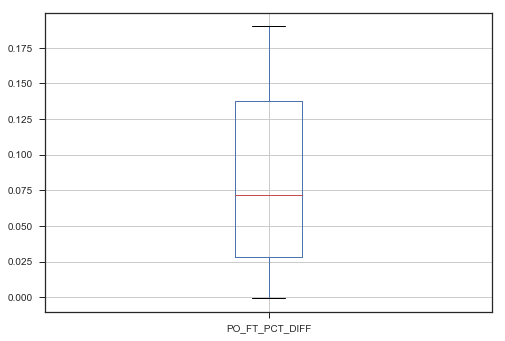

In [157]:
team_clutch.sort_values(by = 'WIN_PCT_201617', ascending = False)[:10].boxplot('PO_FT_PCT_DIFF')

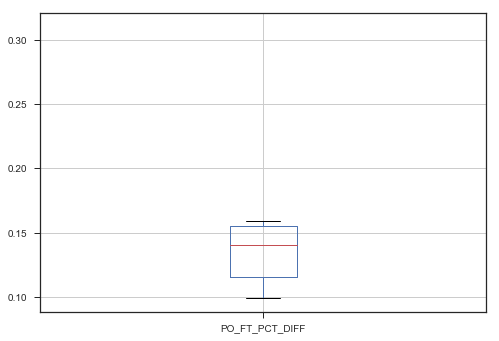

In [158]:
team_clutch.sort_values(by = 'WIN_PCT_201617', ascending = False)[10:20].boxplot('PO_FT_PCT_DIFF')

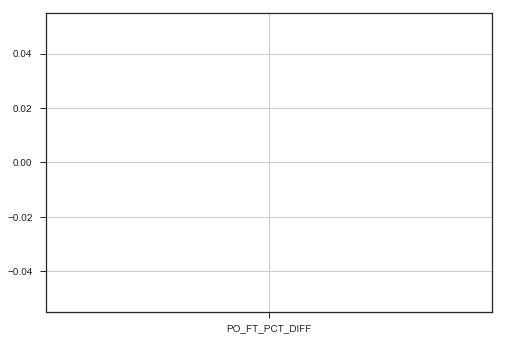

In [159]:
team_clutch.sort_values(by = 'WIN_PCT_201617', ascending = False)[20:].boxplot('PO_FT_PCT_DIFF')

In [160]:
df2.head()

,GROUP_VALUE,DISPLAY_FIRST_LAST,PERSON_ID,FG_PCT,FG3_PCT,FT_PCT,SC_FG_PCT,SC_FG3_PCT,4Q_FT_PCT,PO_FT_PCT,SC_FG_PCT_DIFF,SC_FG3_PCT_DIFF,PO_FT_PCT_DIFF,4Q_FT_PCT_DIFF,TEAM_ID,WIN_PCT_201617,ABBREVIATION
0,2016-17,Alex Abrines,203518,0.393,0.381000,0.898000,0.368000,0.400000,0.857000,0.750,0.025000,-0.019000,0.148,0.041000,1610612760,0.573,OKC
1,2016-17,Quincy Acy,203112,0.377,0.329333,0.723667,0.203667,0.305667,0.712333,NaN,0.173333,0.023667,NaN,0.011333,1610612751,0.244,BKN
2,2016-17,Steven Adams,203500,0.571,0.000000,0.611000,0.333000,0.000000,0.574000,0.364,0.238000,0.000000,0.247,0.037000,1610612760,0.573,OKC
3,2016-17,Arron Afflalo,201167,0.440,0.411000,0.892000,0.360000,0.286000,0.944000,NaN,0.080000,0.125000,NaN,-0.052000,1610612758,0.390,SAC
4,2016-17,Alexis Ajinca,201582,0.500,0.000000,0.725000,0.714000,0.000000,0.600000,NaN,-0.214000,0.000000,NaN,0.125000,1610612740,0.415,NOP


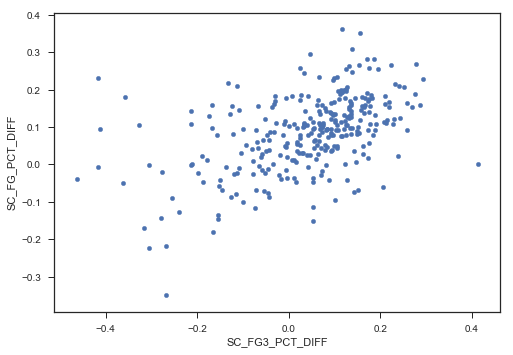

In [180]:
a = df2[df2['SC_FG3_PCT_DIFF'] != 0]
a = a[a['SC_FG3_PCT'] != 0]
a = a[a['SC_FG3_PCT'] != 1]
a = a[a['SC_FG_PCT'] != 0]
a = a[a['SC_FG_PCT'] != 1]
a.plot(y = 'SC_FG_PCT_DIFF', x = 'SC_FG3_PCT_DIFF', kind = 'scatter')

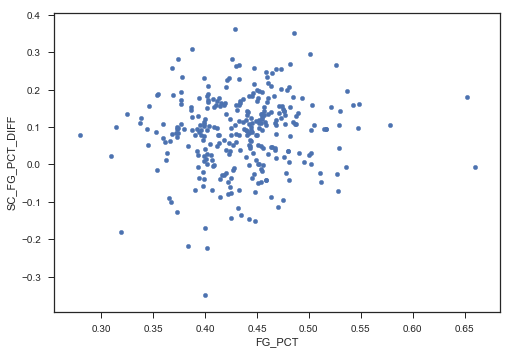

In [181]:
a.plot(y = 'SC_FG_PCT_DIFF', x = 'FG_PCT', kind = 'scatter')

There DOES seem to be a trend here for good shooters under pressure!

In [172]:
good_shooters = df2[df2['SC_FG3_PCT_DIFF'] < -0.1]
good_shooters = good_shooters[good_shooters['SC_FG_PCT_DIFF'] < -0.1]
good_shooters

,GROUP_VALUE,DISPLAY_FIRST_LAST,PERSON_ID,FG_PCT,FG3_PCT,FT_PCT,SC_FG_PCT,SC_FG3_PCT,4Q_FT_PCT,PO_FT_PCT,SC_FG_PCT_DIFF,SC_FG3_PCT_DIFF,PO_FT_PCT_DIFF,4Q_FT_PCT_DIFF,TEAM_ID,WIN_PCT_201617,ABBREVIATION
59,2016-17,Bobby Brown,201628,0.383,0.400000,1.000000,0.600000,0.667000,0.000000,0.0,-0.217000,-0.267000,1.000,1.000000,1610612745,0.671,HOU
124,2016-17,Tyler Ennis,203898,0.425,0.383333,0.790333,0.569333,0.661667,0.910667,NaN,-0.144333,-0.278333,NaN,-0.120333,1610612747,0.317,LAL
129,2016-17,Jordan Farmar,200770,0.333,0.444000,0.000000,0.500000,1.000000,0.000000,NaN,-0.167000,-0.556000,NaN,0.000000,0,NaN,NaN
196,2016-17,Darrun Hilliard,1626199,0.373,0.261000,0.750000,0.500000,0.500000,0.750000,NaN,-0.127000,-0.239000,NaN,0.000000,1610612765,0.451,DET
217,2016-17,Pierre Jackson,203510,0.333,0.273000,0.857000,1.000000,1.000000,0.800000,NaN,-0.667000,-0.727000,NaN,0.057000,0,NaN,NaN
224,2016-17,Jonas Jerebko,201973,0.435,0.346000,0.703000,0.571000,0.500000,0.667000,1.0,-0.136000,-0.154000,-0.297,0.036000,1610612738,0.646,BOS
238,2016-17,Derrick Jones Jr.,1627884,0.562,0.273000,0.707000,1.000000,1.000000,0.857000,NaN,-0.438000,-0.727000,NaN,-0.150000,1610612756,0.293,PHX
286,2016-17,Sheldon McClellan,1627815,0.400,0.233000,0.852000,0.750000,0.500000,0.800000,1.0,-0.350000,-0.267000,-0.148,0.052000,1610612764,0.598,WAS
297,2016-17,Jodie Meeks,201975,0.402,0.409000,0.878000,0.625000,0.714000,0.926000,NaN,-0.223000,-0.305000,NaN,-0.048000,1610612753,0.354,ORL
330,2016-17,Steve Novak,200779,0.286,0.167000,0.000000,1.000000,1.000000,0.000000,NaN,-0.714000,-0.833000,NaN,0.000000,0,NaN,NaN


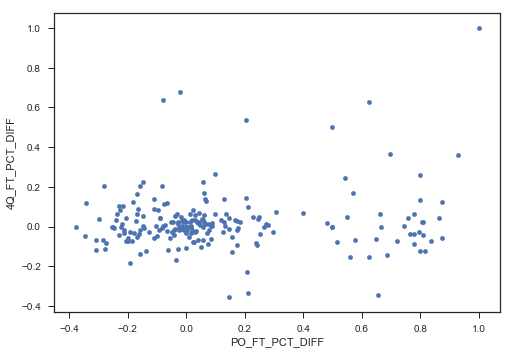

In [164]:
df2.plot(y = '4Q_FT_PCT_DIFF', x = 'PO_FT_PCT_DIFF', kind = 'scatter')